# Speech Emotions Recognition

<center><img src="assets/Speech Emotion Recognition.png"><center>



## Introduction to Speech Emotions Recognition
### What does it mean?
<p style='text-align: justify;'> 
Language has a very broad scope. Besides being used as a communication medium, language can also be interpreted to convey the expression of emotions and feelings of humans to humans, humans to animals, or humans with their surroundings. Language processing has 2 approaches, the first is semantic and the second is emotional. In general, the base level in spoken language is for understanding humans being what talking about, but the one level above it is an emotional approach that more considered. So, fellow parties can respond the emotions and built it up to make the interaction occurs. Here, we can say that emotions have an important role in everyday human (or other living) interactions. </p>

<p style='text-align: justify;'> 
Speech Recognition is not the new technology. Previously is already developed various technologies that combine natural language with computer machines, but without emotions involved inside. If we trace back, emotions are used to response the words given by the first party. This is the reasons why researchers developed a new technology known as Speech Emotion Recognition (SER). SER is a technology that tries to extract sound signals from a speech made by a computer with involving and detecting the emotional activity contained in a speech. 
</p>

### Why do we need them?
<p style='text-align: justify;'>
In the psychological, emotions are one of the most difficult concepts to define. So, why is an emotion necessary and important to be defined? As we discussed earlier, emotions have an important role in shaping an interaction between humans and humans or the surrounding environment.
When SER was first developed, its main objective was for the needs of human psychology research. Another goal is to develop AI as a breakthrough from previous Speech Recognition (SE without involving emotions). Nowadays, in addition to psychological research needs, SER can also be applied in the areas of entertainment, security, banking, call centers, etc.
</p>

## Core Concepts
### Emotion Models
#### Discrete Emotion Model
In discrete model theory, all humans are thought to have basic innate emotions that can be recognized by facial expressions and biological processes. Theorists have conducted studies to determine which emotions are basic.A popular example is Paul Ekman and his colleagues' cross-cultural study of 1992, in which they concluded that the six basic emotions are anger, disgust, fear, happiness, sadness, and surprise. Ekman explains that there are particular characteristics attached to each of these emotions, allowing them to be expressed in varying degrees. 

#### Dimensional Emotion Model
For theoretical and practical reasons, researchers define emotions based on one or more dimensions. In "The Passions of the Soul", Descartes defines and investigates six main passions (wonder, love, hate, desire, joy, sadness, and sadness). Wilhelm Max Wundt, the father of modern psychology, proposed in 1897 that emotions could be described by three dimensions: "pleasant versus unpleasant", "arousing or subjugating" and "tension or relaxation".

### Audio
Audio is the sound produced by the vibration's object. The sound produced by humans comes from the mechanism of action between organs such as the mouth, lungs, throat, vocal cords, and nose. The lungs press the air through the breath valve, then causes the vocal cords to vibrate, producing waves with pressure (impulses) through the air flow in the form of periodic quasi waves or what we call sound. Audio itself has 4 main attributes, namely:

#### Time/Duration

Duration is the length of waves in units of time. In the dataset we use, the average length of duration for each sound data is 3 seconds (3s).

#### Amplitude

Amplitude is the fluctuation in the change of sound waves. The shorter and the more frequent the waves, the higher the pitch or frequency.

#### Sampling rate
Sampling rate is the number of audio samples per second, measured in Hz / KHz. Likes when we work with images, we use pixels as a measure of image qualities. The higher of pixel, means better the image produced. The highest sampling rate for an audio is 44100KHz. However, the most frequent and commonly used sampling rate is 22050 or 22KHz which is the upper limit of the sound that can be heard by humans.

#### Frequency
Frequency is another approach when we want to see the sound waves, but we can't see them directly based on the time domain. The frequency domain may not  visually intuitive, but it will be useful when we go in to sound extraction section. In addition, technically the frequency domain requires less computing space for storage.

Okay for the more details, let's make it more simple by looking at the illustration below.

<img src="https://www.gcsescience.com/transverse-wave.gif">


### Audio Extraction
#### MFCC
MFCC (Mel Frequency Cepstral Coefficents) was first recognized by Davis and Mermelstein in 1980. MFCC is one of the most famous methods for extracting features because its quite good ability to extract sound features. This method adapts the workings of human hearing. To get the MFCC coefficient we will divide the voice signal into several parts with the framing process. Then we will convert each part from the time domain to the frequency domain using Fourier Transform. From the results of the transform, we can calculate the energy at each frequency band using mel filterbank. This process will produce a mel spectrum.  Then mel spectrum will we inverse again to get the MFCC coefficient value in the time domain. Below is a chart of the sound feature extraction process using MFCC. I already completed the explanation for each process from MFCC with mathematical formula that might harder to understand (and maybe I won't give a very detailed explanation). But still, I will try to make it more concise by describing why each process needs to be done
<br>
<center><img src="assets/MFCC.png" width=650><center>
    

##### Framing

The audio signal will continue to change all the time, so to simplify we try to assume that in a short time scale the audio signal does not change much (the stationary sample continues to change on a short time scale). Therefore we devide the signal into several frames into 20-40 ms. This framing process continues until all signals can be processed. In addition, this process is generally carried out by overlapping for each frame.

<img src="assets/framming.jpg">

Case Study : Frame the signal into 20-40 ms frames. 25ms is standard. This means the frame length for a 16kHz signal is 0.025x16000 = 400 samples. Frame step is usually something like 10ms (160 samples), which allows some overlap to the frames. The first 400 sample frame starts at sample 0, the next 400 sample frame starts at sample 160 etc. until the end of the speech file is reached.

##### Windowing
The goal of windowing is to minimize discontinuities that occur in the signal, which is caused by spectral leakage during the frame blocking process where new signals have different frequencies from the original signal. The concept of windowing is to sharpening the signal come up to zero at the beginning and the ending of each frame.

Window stated as $w(n), 0 ≤ n ≤ N −1$, where N is number of samples in each frame, $xi(n)$ is the input signal and the windowing result is $yi(n)$

$yi(n) = xi(n)w(n) , 0 ≤ n ≤ N − 1$

The type of window that is often used is Hamming window, which can be formulated by:

$w(n) = 0.54 - 0.46 cos(\frac{2\pi n}{N-1})$    , 0<=n<=N-1


<center>
<img src="assets/windowing.png"><center>

#### Fourier Transform 
<img src="assets/Fourier.PNG" width=700>

The next step is to calculate the power spectrum of each frame. This is motivated by the human cochlea (an organ in the ear) which vibrates at different spots depending on the frequency of the incoming sounds. Depending on the location in the cochlea that vibrates (which wobbles small hairs), different nerves fire informing the brain that certain frequencies are present. Our periodogram estimate and  identifying which frequencies are present in the frame.

**Case Studies:**

The next steps are applied to every single frame, one set of 12 MFCC coefficients is extracted for each frame. A short aside on notation: we call our time domain signal $s(n)$. Once it is framed we have $si(n)$ where $n$ ranges over 1-400 (if our frames are 400 samples) and  ranges over the number of frames. When we calculate the complex DFT, we get $Si(k)$ where the  denotes the frame number corresponding to the time-domain frame. $Pi(k)$ is then the power spectrum of frame $i$.

$Si(k) = \sum_{n=1}^N si(n)h(n)e^{j2\pi kn/N}$ , $1<=k<=K$

where $h(n)$ is an N sample long window and K is the length of DFT. Periodogram-based power spectral estimate for the speech frame $si(n)$ is given by:

$Pi(k) = \frac{1}{N}\left\lvert{Si(k)}\right\rvert^{2}$

This is called the Periodogram estimate of the power spectrum. We take the absolute value of the complex fourier transform, and square the result. We would generally perform a 512 point FFT and keep only the first 257 coefficents.

DFT calculation directly in computerization can cause the process very long calculation. This happened
because of DFT required $N^{2}$ multiplication complex number. Because it, we need another approach for
calculate DFT quickly. That can performed using Fast Fourier Transform (FFT) where FFT eliminating the twin calculation process in DFT. The FFT algorithm only requires N log2 N complex multiplication.

#### Mel Frequency Wrapping
Mel Frequency Warping is generally done by using Filterbank. Filterbank is of filter that has the goal to find out the energy size of certain frequency bands in the sound signal. For purposes of MFCC, filters must be applied in the domain frequency. Once again, this method is adapted from the way the cochlea works. In the cochlea, there are separate parts that regulate the production of sounds based on certain frequencies. 

<img src="assets/koklea.jpg" width=400>

Human perception of frequency in the signal sound does not follow a linear scale. The frequency with which actually (in Hz) in a signal will be measured humans subjectively with use mel scale. To calculate mel scale we use:

$mel(f) = 1125 ln(1+\frac{f}{700})$ ,
where mel(f) is function of mel scale and f is frequency.

the most popular mel filter used is the triangular mel filter. 
<img src="https://haythamfayek.com/assets/posts/post1/mel_filters.jpg" width=500>

#### Discrete Cosine Transform
The last step of feature extraction using MFCC is to return the log mel spectrum to the time domain. The basic concept of DCT is decorrelation the mel spectrum(because our filterbanks are all overlapping, the filterbank energies are quite correlated with each other). The DCT will return mel cepstral.

## Let's Start the Code

### Dependencies
<p style='text-align: justify;'>
Before you do a sound analysis, the first thing to do is installing the LibROSA package from python. LibROSA is a python package for music and audio analysis. It provides the building blocks necessary to create music information retrieval systems. Later we will use this library to read audio data and extract sound features. As for modeling and training data for classification we will use Keras.

```
!pip install librosa
!pip install SoundFile
```


In [208]:
import librosa
import librosa.display
import IPython.display as ipd
import pandas as pd
import matplotlib.pyplot as plt
import soundfile
import os, glob, pickle
import numpy as np

import keras
from keras import regularizers
from keras.preprocessing import sequence
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
from keras.models import Sequential, Model, model_from_json
from keras.layers import Dense, Embedding, LSTM
from keras.layers import Input, Flatten, Dropout, Activation, BatchNormalization
from keras.layers import Conv1D, MaxPooling1D, AveragePooling1D
from keras.layers import Conv2D, MaxPooling2D, AveragePooling2D
from keras.utils import np_utils, to_categorical
from keras.callbacks import ModelCheckpoint

from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

In [2]:
# from pydrive.auth import GoogleAuth 
# from pydrive.drive import GoogleDrive
# from google.colab import auth
# from oauth2client.client import GoogleCredentials
# auth.authenticate_user()
# gauth = GoogleAuth()
# gauth.credentials = GoogleCredentials.get_application_default()
# drive = GoogleDrive(gauth)

# mfcc_res = "1me1TtLvVwv4yGJEw94tah0amuGFq1F6Q"
# downloaded = drive.CreateFile({'id':mfcc_res})
# downloaded.GetContentFile('mfcc_result.pkl')

In [3]:
# from google.colab import drive
# drive.mount('/content/drive')

### The Dataset

Processing and classifying voice data is a challenging because it will be a bit heavy on the labeling part. This is because everyone has different perspectives on emotions. This time we will use the RAVDESS dataset (The Ryerson Audio-Visual Database of Emotional Speech and Song) which is a voice recording dataset of 24 actors (male and female). This voice recording voiced two statements in a neutral North American accent. Speech sounds include expressions of calm, happiness, sadness, anger, fear, surprise, and disgust. Each expression is produced at two levels of emotional intensity (normal, strong), with additional neutral expressions. RAVDESS contains 1440 files: 60 trials per actor x 24 actors = 1440 data.

If you look at the name of each sound file, you will find a sequence of numbers that is a file recognition / identity code. The following is the identification of the file names in the RAVDESS dataset in accordance with the documentation on the [Zenodo] website (https://zenodo.org/record/1188976):

**Filename identifiers** 
- Modality (01 = full-AV, 02 = video-only, 03 = audio-only)
- Vocal channel (01 = speech, 02 = song)
- Emotion (01 = neutral, 02 = calm, 03 = happy, 04 = sad, 05 = angry, 06 = fearful, 07 = disgust, 08 = surprised)
- Emotional intensity (01 = normal, 02 = strong). NOTE: There is no strong intensity for the 'neutral' emotion
- Statement (01 = "Kids are talking by the door", 02 = "Dogs are sitting by the door")
- Repetition (01 = 1st repetition, 02 = 2nd repetition)
- Actor (01 to 24. Odd numbered actors are male, even numbered actors are female)

**Filename example: 03-01-08-02-02-02-14.wav**
- Audio-only (03)
- Speech (01)
- Surprised (08)
- String intensity (02)
- Statement "dogs" (02)
- 2nd Repetition (02)
- 14th Actor (14) Female, as the actor ID number is even.

In [11]:
# from google.colab import drive
# drive.mount('/content/gdrive', force_remount=True)

# root_dir = "/content/gdrive/My Drive/"
# base_dir = root_dir + 'Quarterly Content/RAV'

Mounted at /content/gdrive


### Read Audio Files

In [193]:
RAV = "RAV/"
dir_list = os.listdir(RAV)
dir_list.sort()

In [194]:
# RAV = "/content/gdrive/My Drive/Quarterly Content/RAV/"

emotion = []
gender = []
path = []

for i in dir_list:
    speech_name = os.listdir(RAV + i)
    for speech in speech_name:
        part = speech.split('.')[0].split('-')
        emotion.append(int(part[2]))
        temp = int(part[6])
        if temp%2 == 0:
            temp = "female"
        else:
            temp = "male"
        gender.append(temp)
        path.append(RAV + i + '/' + speech)
        
ravdess = pd.DataFrame(emotion)
ravdess = ravdess.replace({1:'neutral', 2:'neutral', 3:'happy', 4:'sad', 5:'angry', 6:'fear', 7:'disgust', 8:'surprise'})
ravdess = pd.concat([pd.DataFrame(gender),ravdess],axis=1)
ravdess.columns = ['gender','emotion']
ravdess['label'] = ravdess['gender'] + '_' + ravdess['emotion']
ravdess = pd.concat([ravdess,pd.DataFrame(path, columns = ['path'])],axis=1)
ravdess = ravdess.drop(['gender', 'emotion'], axis=1)
ravdess.head()

,label,path
0,male_neutral,RAV/Actor_01/03-01-01-01-01-01-01.wav
1,male_neutral,RAV/Actor_01/03-01-01-01-01-02-01.wav
2,male_neutral,RAV/Actor_01/03-01-01-01-02-01-01.wav
3,male_neutral,RAV/Actor_01/03-01-01-01-02-02-01.wav
4,male_neutral,RAV/Actor_01/03-01-02-01-01-01-01.wav


Dari data yang telah kita baca, mari kita lakukan inspeksi terhadap proporsi dari masing-masing kelas.

In [195]:
ravdess.label.value_counts()

male_neutral       144
female_neutral     144
female_disgust      96
male_fear           96
female_angry        96
male_angry          96
male_sad            96
male_happy          96
male_disgust        96
female_surprise     96
female_fear         96
female_sad          96
female_happy        96
male_surprise       96
Name: label, dtype: int64

Okay, we have got a label for each speech file. The following is an example of one of the speeches and emotions spoken by the actor who is complemented by the sound waves. We will see the pattern of surprised expressions.

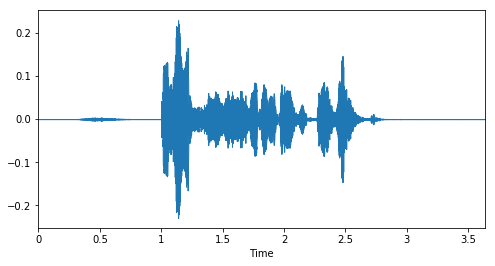

In [113]:
speech_name = RAV + 'Actor_24/03-01-08-02-02-02-24.wav'  
data, sampling_rate = librosa.load(speech_name)
plt.figure(figsize=(8, 4))
librosa.display.waveplot(data, sr=sampling_rate)

ipd.Audio(speech_name)

### Feature Extraction

Here we go! Feature extraction is one of the determining parts in the success of the classification model later. At this stage, we use MFCC to extract voice features in our data. The MFCC coefficient to be used is 13.

In [196]:
from tqdm import tqdm
input_duration=3

In [197]:
data = pd.DataFrame(columns=['feature'])
for i in tqdm(range(len(ravdess))):
    X, sample_rate = librosa.load(ravdess.path[i], res_type='kaiser_fast',duration=input_duration,sr=44100,offset=0.5)
    sample_rate = np.array(sample_rate)
    mfccs = np.mean(librosa.feature.mfcc(y=X, sr=sample_rate, n_mfcc=13), axis=0)
    feature = mfccs
    data.loc[i] = [feature]


100%|██████████████████████████████████████████████████████████████████████████████| 1440/1440 [02:02<00:00, 12.04it/s]


In [198]:
data.to_pickle("mfcc13_result.pkl")

In [199]:
data = pd.read_pickle("mfcc13_result.pkl")
data.head()

,feature
0,"[-65.80214, -65.80214, -65.80214, -65.80214, -..."
1,"[-62.625893, -63.899044, -64.441826, -59.98270..."
2,"[-65.82013, -65.82013, -65.82013, -65.82013, -..."
3,"[-66.05952, -66.05952, -66.05952, -66.05952, -..."
4,"[-70.26908, -70.26908, -70.26908, -70.26908, -..."


In [200]:
mfcc_result = pd.concat([ravdess,pd.DataFrame(data['feature'].values.tolist())],axis=1)
mfcc_result = mfcc_result.fillna(0)
mfcc_result.head()

,label,path,0,1,2,3,4,5,6,7,...,249,250,251,252,253,254,255,256,257,258
0,male_neutral,RAV/Actor_01/03-01-01-01-01-01-01.wav,-65.802139,-65.802139,-65.802139,-65.802139,-65.802139,-65.802139,-65.802139,-65.802139,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
1,male_neutral,RAV/Actor_01/03-01-01-01-01-02-01.wav,-62.625893,-63.899044,-64.441826,-59.982704,-60.297195,-61.611835,-64.753067,-65.390709,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
2,male_neutral,RAV/Actor_01/03-01-01-01-02-01-01.wav,-65.820129,-65.820129,-65.820129,-65.820129,-65.820129,-65.820129,-65.820129,-65.820129,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
3,male_neutral,RAV/Actor_01/03-01-01-01-02-02-01.wav,-66.059517,-66.059517,-66.059517,-66.059517,-66.059517,-66.059517,-66.059517,-66.059517,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
4,male_neutral,RAV/Actor_01/03-01-02-01-01-01-01.wav,-70.269081,-70.269081,-70.269081,-70.269081,-70.269081,-70.269081,-70.269081,-70.269081,...,-70.269081,-70.269081,-70.269081,-70.269081,-70.269081,-70.269081,-70.269081,-70.269081,-70.269081,-70.269081


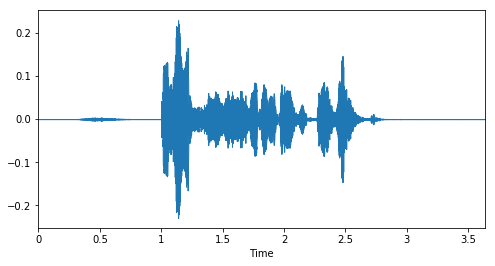

In [251]:
speech_name = RAV + 'Actor_24/03-01-08-02-02-02-24.wav'  
data, sampling_rate = librosa.load(speech_name)
plt.figure(figsize=(8, 4))
librosa.display.waveplot(data, sr=sampling_rate)

ipd.Audio(speech_name)

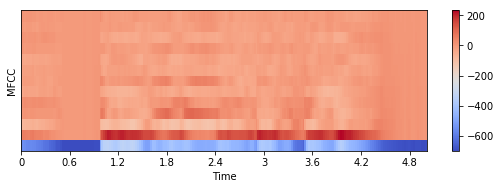

In [256]:
X, sample_rate = librosa.load(speech_name, res_type='kaiser_fast',duration=2.5,sr=22050*2,offset=0.5)  
mfcc = librosa.feature.mfcc(y=X, sr=sample_rate, n_mfcc=13)
plt.figure(figsize=(20, 15))
plt.subplot(5,2,1)
librosa.display.specshow(mfcc, x_axis='time')
plt.ylabel('MFCC')
plt.colorbar()

If a cepstral coefficient has a positive value, the majority of the spectral energy is concentrated in the low-frequency regions. On the other hand, if a cepstral coefficient has a negative value, it represents that most of the spectral energy is concentrated at high frequencies.

### Splitting Data

Split data used to separate our data into data train and data test. We use 80:20 comparison where the side that is widely used for data train. We use the 80:20 ratio, where 80% of the data will be used for the data train.

In [201]:
X_train, X_test, y_train, y_test = train_test_split(mfcc_result.drop(['label','path'],axis=1)
                                                    , mfcc_result.label
                                                    , test_size=0.20
                                                    , shuffle=True
                                                    , random_state=14)

# Lets see how the data present itself before normalisation 
X_train.head()

,0,1,2,3,4,5,6,7,8,9,...,249,250,251,252,253,254,255,256,257,258
927,-62.068378,-62.068378,-62.068378,-62.068378,-62.068378,-62.068378,-62.068378,-62.068378,-62.068378,-62.068378,...,-48.316956,-53.530903,-55.718864,-48.331509,-46.811340,-49.456795,-50.966568,-52.766502,-53.816978,-55.837215
720,-67.696579,-67.696579,-67.696579,-66.540764,-64.667526,-67.696220,-64.721085,-60.823261,-60.720661,-60.867615,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
1309,-55.060894,-54.767929,-55.363300,-56.635136,-56.879433,-56.234085,-55.209923,-54.918987,-55.181011,-53.630711,...,-51.678818,-51.585617,-53.388664,-56.718632,-56.740730,-56.734154,-54.340416,-55.399624,-56.740730,-56.740730
1413,-49.019981,-49.019981,-49.019981,-49.019981,-49.019981,-49.019981,-49.019981,-49.019981,-49.019981,-49.019981,...,-42.615055,-42.294029,-42.565758,-45.422867,-46.862446,-46.374352,-47.499435,-48.948647,-49.019981,-49.019981
248,-60.916843,-59.755989,-60.148190,-64.236969,-60.312096,-57.904274,-60.408367,-68.364609,-73.609062,-72.540108,...,-38.722992,-35.913227,-36.520840,-38.587452,-38.757744,-40.600315,-37.451675,-31.688284,-31.354412,-30.634077


In [202]:
mean = np.mean(X_train, axis=0)
std = np.std(X_train, axis=0)

X_train = (X_train - mean)/std
X_test = (X_test - mean)/std

In [203]:
X_train = np.array(X_train)
y_train = np.array(y_train)
X_test = np.array(X_test)
y_test = np.array(y_test)

lb = LabelEncoder()
y_train = np_utils.to_categorical(lb.fit_transform(y_train))
y_test = np_utils.to_categorical(lb.fit_transform(y_test))

In [204]:
print(X_train.shape)
print(lb.classes_)

(1152, 259)
['female_angry' 'female_disgust' 'female_fear' 'female_happy'
 'female_neutral' 'female_sad' 'female_surprise' 'male_angry'
 'male_disgust' 'male_fear' 'male_happy' 'male_neutral' 'male_sad'
 'male_surprise']


In [205]:
filename = 'labels'
outfile = open(filename,'wb')
pickle.dump(lb,outfile)
outfile.close()

In [206]:
X_train = np.expand_dims(X_train, axis=2)
X_test = np.expand_dims(X_test, axis=2)
X_train.shape

(1152, 259, 1)

### Build the Model

In [209]:
model = Sequential()
model.add(Conv1D(256, 8, padding='same',input_shape=(X_train.shape[1],1)))  # X_train.shape[1] = No. of Columns
model.add(Activation('relu'))
model.add(Conv1D(256, 8, padding='same'))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Dropout(0.25))
model.add(MaxPooling1D(pool_size=(8)))
model.add(Conv1D(128, 8, padding='same'))
model.add(Activation('relu'))
model.add(Conv1D(128, 8, padding='same'))
model.add(Activation('relu'))
model.add(Conv1D(128, 8, padding='same'))
model.add(Activation('relu'))
model.add(Conv1D(128, 8, padding='same'))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Dropout(0.25))
model.add(MaxPooling1D(pool_size=(8)))
model.add(Conv1D(64, 8, padding='same'))
model.add(Activation('relu'))
model.add(Conv1D(64, 8, padding='same'))
model.add(Activation('relu'))
model.add(Flatten())
model.add(Dense(14)) # Target class number
model.add(Activation('softmax'))
opt = keras.optimizers.rmsprop(lr=0.001, decay=1e-6)
model.summary()

Model: "sequential_16"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_96 (Conv1D)           (None, 259, 256)          2304      
_________________________________________________________________
activation_109 (Activation)  (None, 259, 256)          0         
_________________________________________________________________
conv1d_97 (Conv1D)           (None, 259, 256)          524544    
_________________________________________________________________
batch_normalization_23 (Batc (None, 259, 256)          1024      
_________________________________________________________________
activation_110 (Activation)  (None, 259, 256)          0         
_________________________________________________________________
dropout_25 (Dropout)         (None, 259, 256)          0         
_________________________________________________________________
max_pooling1d_25 (MaxPooling (None, 32, 256)         

In [210]:
model.compile(loss='categorical_crossentropy', optimizer=opt,metrics=['accuracy'])
model_history=model.fit(X_train, y_train, batch_size=16, epochs=70, validation_data=(X_test, y_test))

Train on 1152 samples, validate on 288 samples
Epoch 1/70
1152/1152 [==============================] - ETA: 1:33 - loss: 3.0735 - accuracy: 0.0000e+ - ETA: 53s - loss: 3.0702 - accuracy: 0.0312     - ETA: 39s - loss: 3.0893 - accuracy: 0.041 - ETA: 33s - loss: 3.0073 - accuracy: 0.031 - ETA: 29s - loss: 2.8683 - accuracy: 0.087 - ETA: 26s - loss: 2.7856 - accuracy: 0.104 - ETA: 24s - loss: 2.7488 - accuracy: 0.125 - ETA: 22s - loss: 2.7242 - accuracy: 0.140 - ETA: 21s - loss: 2.6783 - accuracy: 0.152 - ETA: 20s - loss: 2.6996 - accuracy: 0.150 - ETA: 19s - loss: 2.6926 - accuracy: 0.142 - ETA: 18s - loss: 2.6843 - accuracy: 0.135 - ETA: 17s - loss: 2.6800 - accuracy: 0.129 - ETA: 17s - loss: 2.6561 - accuracy: 0.125 - ETA: 16s - loss: 2.6606 - accuracy: 0.116 - ETA: 15s - loss: 2.6439 - accuracy: 0.125 - ETA: 15s - loss: 2.6417 - accuracy: 0.125 - ETA: 14s - loss: 2.6221 - accuracy: 0.131 - ETA: 14s - loss: 2.6255 - accuracy: 0.128 - ETA: 14s - loss: 2.6136 - accuracy: 0.137 - ETA: 13s

1152/1152 [==============================] - ETA: 16s - loss: 1.5526 - accuracy: 0.500 - ETA: 15s - loss: 1.6964 - accuracy: 0.468 - ETA: 15s - loss: 1.7469 - accuracy: 0.416 - ETA: 15s - loss: 1.8273 - accuracy: 0.390 - ETA: 15s - loss: 1.8305 - accuracy: 0.375 - ETA: 15s - loss: 1.8992 - accuracy: 0.364 - ETA: 15s - loss: 1.9268 - accuracy: 0.339 - ETA: 15s - loss: 1.9914 - accuracy: 0.328 - ETA: 15s - loss: 1.9830 - accuracy: 0.333 - ETA: 14s - loss: 1.9557 - accuracy: 0.343 - ETA: 14s - loss: 1.9449 - accuracy: 0.352 - ETA: 14s - loss: 1.9746 - accuracy: 0.338 - ETA: 14s - loss: 1.9643 - accuracy: 0.341 - ETA: 13s - loss: 1.9592 - accuracy: 0.339 - ETA: 13s - loss: 1.9620 - accuracy: 0.329 - ETA: 13s - loss: 1.9332 - accuracy: 0.347 - ETA: 13s - loss: 1.9294 - accuracy: 0.341 - ETA: 12s - loss: 1.9343 - accuracy: 0.329 - ETA: 12s - loss: 1.9312 - accuracy: 0.325 - ETA: 12s - loss: 1.9226 - accuracy: 0.328 - ETA: 12s - loss: 1.9384 - accuracy: 0.318 - ETA: 11s - loss: 1.9295 - accur

1152/1152 [==============================] - ETA: 18s - loss: 1.6505 - accuracy: 0.375 - ETA: 17s - loss: 1.6559 - accuracy: 0.406 - ETA: 17s - loss: 1.6872 - accuracy: 0.395 - ETA: 17s - loss: 1.7479 - accuracy: 0.359 - ETA: 17s - loss: 1.7746 - accuracy: 0.375 - ETA: 16s - loss: 1.7386 - accuracy: 0.385 - ETA: 16s - loss: 1.7232 - accuracy: 0.375 - ETA: 16s - loss: 1.7542 - accuracy: 0.335 - ETA: 16s - loss: 1.7458 - accuracy: 0.347 - ETA: 15s - loss: 1.7656 - accuracy: 0.325 - ETA: 15s - loss: 1.7857 - accuracy: 0.323 - ETA: 15s - loss: 1.7593 - accuracy: 0.328 - ETA: 14s - loss: 1.7456 - accuracy: 0.336 - ETA: 14s - loss: 1.7235 - accuracy: 0.343 - ETA: 14s - loss: 1.7360 - accuracy: 0.345 - ETA: 14s - loss: 1.7330 - accuracy: 0.343 - ETA: 13s - loss: 1.7222 - accuracy: 0.349 - ETA: 13s - loss: 1.7131 - accuracy: 0.357 - ETA: 13s - loss: 1.7359 - accuracy: 0.361 - ETA: 13s - loss: 1.7554 - accuracy: 0.356 - ETA: 12s - loss: 1.7422 - accuracy: 0.351 - ETA: 12s - loss: 1.7339 - accur

1152/1152 [==============================] - ETA: 13s - loss: 1.6798 - accuracy: 0.375 - ETA: 14s - loss: 1.6863 - accuracy: 0.406 - ETA: 13s - loss: 1.7027 - accuracy: 0.395 - ETA: 14s - loss: 1.7096 - accuracy: 0.359 - ETA: 13s - loss: 1.6553 - accuracy: 0.375 - ETA: 13s - loss: 1.6822 - accuracy: 0.343 - ETA: 13s - loss: 1.6682 - accuracy: 0.366 - ETA: 13s - loss: 1.6282 - accuracy: 0.375 - ETA: 13s - loss: 1.6388 - accuracy: 0.381 - ETA: 12s - loss: 1.6510 - accuracy: 0.368 - ETA: 12s - loss: 1.6718 - accuracy: 0.358 - ETA: 12s - loss: 1.6630 - accuracy: 0.369 - ETA: 12s - loss: 1.6916 - accuracy: 0.365 - ETA: 12s - loss: 1.6748 - accuracy: 0.361 - ETA: 12s - loss: 1.7021 - accuracy: 0.354 - ETA: 11s - loss: 1.6759 - accuracy: 0.367 - ETA: 11s - loss: 1.6784 - accuracy: 0.367 - ETA: 11s - loss: 1.6688 - accuracy: 0.371 - ETA: 11s - loss: 1.6648 - accuracy: 0.375 - ETA: 11s - loss: 1.6671 - accuracy: 0.378 - ETA: 10s - loss: 1.6534 - accuracy: 0.386 - ETA: 10s - loss: 1.6518 - accur

1152/1152 [==============================] - ETA: 14s - loss: 1.5880 - accuracy: 0.437 - ETA: 14s - loss: 1.4220 - accuracy: 0.437 - ETA: 14s - loss: 1.4423 - accuracy: 0.416 - ETA: 14s - loss: 1.4890 - accuracy: 0.406 - ETA: 14s - loss: 1.4896 - accuracy: 0.400 - ETA: 14s - loss: 1.4574 - accuracy: 0.416 - ETA: 14s - loss: 1.5066 - accuracy: 0.410 - ETA: 14s - loss: 1.4872 - accuracy: 0.437 - ETA: 13s - loss: 1.5023 - accuracy: 0.423 - ETA: 13s - loss: 1.4847 - accuracy: 0.431 - ETA: 13s - loss: 1.4734 - accuracy: 0.443 - ETA: 13s - loss: 1.4593 - accuracy: 0.453 - ETA: 12s - loss: 1.4511 - accuracy: 0.447 - ETA: 12s - loss: 1.5109 - accuracy: 0.433 - ETA: 12s - loss: 1.5234 - accuracy: 0.433 - ETA: 12s - loss: 1.5211 - accuracy: 0.429 - ETA: 11s - loss: 1.5111 - accuracy: 0.433 - ETA: 11s - loss: 1.5061 - accuracy: 0.434 - ETA: 11s - loss: 1.4885 - accuracy: 0.437 - ETA: 11s - loss: 1.4922 - accuracy: 0.425 - ETA: 11s - loss: 1.4986 - accuracy: 0.419 - ETA: 10s - loss: 1.5022 - accur

1152/1152 [==============================] - ETA: 15s - loss: 1.1583 - accuracy: 0.562 - ETA: 15s - loss: 0.9998 - accuracy: 0.625 - ETA: 15s - loss: 1.5004 - accuracy: 0.479 - ETA: 15s - loss: 1.4346 - accuracy: 0.468 - ETA: 15s - loss: 1.4846 - accuracy: 0.450 - ETA: 15s - loss: 1.4823 - accuracy: 0.458 - ETA: 14s - loss: 1.4704 - accuracy: 0.464 - ETA: 14s - loss: 1.4603 - accuracy: 0.460 - ETA: 14s - loss: 1.4525 - accuracy: 0.458 - ETA: 14s - loss: 1.5084 - accuracy: 0.437 - ETA: 13s - loss: 1.5191 - accuracy: 0.443 - ETA: 13s - loss: 1.4971 - accuracy: 0.442 - ETA: 13s - loss: 1.4876 - accuracy: 0.456 - ETA: 13s - loss: 1.4788 - accuracy: 0.455 - ETA: 12s - loss: 1.4683 - accuracy: 0.458 - ETA: 12s - loss: 1.4840 - accuracy: 0.453 - ETA: 12s - loss: 1.4768 - accuracy: 0.452 - ETA: 12s - loss: 1.4614 - accuracy: 0.458 - ETA: 11s - loss: 1.4790 - accuracy: 0.453 - ETA: 11s - loss: 1.4792 - accuracy: 0.453 - ETA: 11s - loss: 1.4989 - accuracy: 0.452 - ETA: 11s - loss: 1.4897 - accur

1152/1152 [==============================] - ETA: 16s - loss: 1.2262 - accuracy: 0.500 - ETA: 15s - loss: 1.1323 - accuracy: 0.562 - ETA: 15s - loss: 1.1440 - accuracy: 0.520 - ETA: 15s - loss: 1.2069 - accuracy: 0.515 - ETA: 15s - loss: 1.2889 - accuracy: 0.500 - ETA: 15s - loss: 1.2527 - accuracy: 0.510 - ETA: 15s - loss: 1.2029 - accuracy: 0.526 - ETA: 15s - loss: 1.2275 - accuracy: 0.507 - ETA: 15s - loss: 1.2426 - accuracy: 0.493 - ETA: 15s - loss: 1.2603 - accuracy: 0.493 - ETA: 14s - loss: 1.2627 - accuracy: 0.483 - ETA: 14s - loss: 1.2575 - accuracy: 0.489 - ETA: 14s - loss: 1.2623 - accuracy: 0.485 - ETA: 14s - loss: 1.2451 - accuracy: 0.495 - ETA: 13s - loss: 1.2507 - accuracy: 0.500 - ETA: 13s - loss: 1.2522 - accuracy: 0.492 - ETA: 13s - loss: 1.2681 - accuracy: 0.489 - ETA: 13s - loss: 1.2771 - accuracy: 0.493 - ETA: 12s - loss: 1.2554 - accuracy: 0.500 - ETA: 12s - loss: 1.2464 - accuracy: 0.506 - ETA: 12s - loss: 1.2565 - accuracy: 0.500 - ETA: 12s - loss: 1.2409 - accur

1152/1152 [==============================] - ETA: 15s - loss: 1.1225 - accuracy: 0.687 - ETA: 16s - loss: 1.2103 - accuracy: 0.593 - ETA: 16s - loss: 1.1872 - accuracy: 0.583 - ETA: 16s - loss: 1.2796 - accuracy: 0.531 - ETA: 16s - loss: 1.2030 - accuracy: 0.562 - ETA: 15s - loss: 1.2000 - accuracy: 0.562 - ETA: 15s - loss: 1.1549 - accuracy: 0.598 - ETA: 15s - loss: 1.1818 - accuracy: 0.585 - ETA: 14s - loss: 1.1468 - accuracy: 0.604 - ETA: 14s - loss: 1.2146 - accuracy: 0.587 - ETA: 14s - loss: 1.2096 - accuracy: 0.579 - ETA: 14s - loss: 1.2155 - accuracy: 0.562 - ETA: 14s - loss: 1.2243 - accuracy: 0.557 - ETA: 13s - loss: 1.2147 - accuracy: 0.562 - ETA: 13s - loss: 1.2089 - accuracy: 0.562 - ETA: 13s - loss: 1.2066 - accuracy: 0.566 - ETA: 13s - loss: 1.2089 - accuracy: 0.566 - ETA: 13s - loss: 1.1998 - accuracy: 0.566 - ETA: 12s - loss: 1.2238 - accuracy: 0.552 - ETA: 12s - loss: 1.2396 - accuracy: 0.537 - ETA: 12s - loss: 1.2430 - accuracy: 0.541 - ETA: 12s - loss: 1.2252 - accur

1152/1152 [==============================] - ETA: 16s - loss: 1.0056 - accuracy: 0.562 - ETA: 15s - loss: 1.0360 - accuracy: 0.593 - ETA: 16s - loss: 1.0596 - accuracy: 0.583 - ETA: 16s - loss: 1.0059 - accuracy: 0.625 - ETA: 15s - loss: 1.0836 - accuracy: 0.587 - ETA: 15s - loss: 1.1186 - accuracy: 0.572 - ETA: 15s - loss: 1.2124 - accuracy: 0.553 - ETA: 15s - loss: 1.2014 - accuracy: 0.570 - ETA: 15s - loss: 1.1954 - accuracy: 0.569 - ETA: 15s - loss: 1.1751 - accuracy: 0.568 - ETA: 15s - loss: 1.1661 - accuracy: 0.556 - ETA: 14s - loss: 1.1236 - accuracy: 0.572 - ETA: 14s - loss: 1.0884 - accuracy: 0.591 - ETA: 14s - loss: 1.0635 - accuracy: 0.598 - ETA: 14s - loss: 1.0661 - accuracy: 0.587 - ETA: 13s - loss: 1.0448 - accuracy: 0.601 - ETA: 13s - loss: 1.0562 - accuracy: 0.599 - ETA: 13s - loss: 1.0415 - accuracy: 0.600 - ETA: 13s - loss: 1.0946 - accuracy: 0.578 - ETA: 12s - loss: 1.0963 - accuracy: 0.584 - ETA: 12s - loss: 1.0976 - accuracy: 0.583 - ETA: 12s - loss: 1.0945 - accur

1152/1152 [==============================] - ETA: 17s - loss: 1.7661 - accuracy: 0.375 - ETA: 16s - loss: 1.3311 - accuracy: 0.500 - ETA: 16s - loss: 1.2315 - accuracy: 0.520 - ETA: 15s - loss: 1.1508 - accuracy: 0.578 - ETA: 15s - loss: 1.1098 - accuracy: 0.600 - ETA: 15s - loss: 1.0723 - accuracy: 0.625 - ETA: 15s - loss: 1.1006 - accuracy: 0.625 - ETA: 15s - loss: 1.1668 - accuracy: 0.617 - ETA: 14s - loss: 1.1341 - accuracy: 0.631 - ETA: 14s - loss: 1.1225 - accuracy: 0.625 - ETA: 14s - loss: 1.1338 - accuracy: 0.613 - ETA: 14s - loss: 1.0959 - accuracy: 0.625 - ETA: 14s - loss: 1.0894 - accuracy: 0.610 - ETA: 13s - loss: 1.1032 - accuracy: 0.598 - ETA: 13s - loss: 1.0884 - accuracy: 0.608 - ETA: 13s - loss: 1.0744 - accuracy: 0.617 - ETA: 13s - loss: 1.0503 - accuracy: 0.621 - ETA: 12s - loss: 1.0501 - accuracy: 0.628 - ETA: 12s - loss: 1.0497 - accuracy: 0.625 - ETA: 12s - loss: 1.0465 - accuracy: 0.625 - ETA: 12s - loss: 1.0466 - accuracy: 0.625 - ETA: 11s - loss: 1.0428 - accur

1152/1152 [==============================] - ETA: 15s - loss: 0.9685 - accuracy: 0.750 - ETA: 15s - loss: 0.9272 - accuracy: 0.781 - ETA: 14s - loss: 1.0851 - accuracy: 0.666 - ETA: 13s - loss: 1.0517 - accuracy: 0.640 - ETA: 14s - loss: 1.0325 - accuracy: 0.650 - ETA: 14s - loss: 0.9581 - accuracy: 0.677 - ETA: 14s - loss: 0.9581 - accuracy: 0.660 - ETA: 14s - loss: 0.9739 - accuracy: 0.648 - ETA: 14s - loss: 0.9111 - accuracy: 0.680 - ETA: 14s - loss: 0.9184 - accuracy: 0.681 - ETA: 14s - loss: 0.9342 - accuracy: 0.664 - ETA: 14s - loss: 0.9185 - accuracy: 0.661 - ETA: 14s - loss: 0.8951 - accuracy: 0.677 - ETA: 13s - loss: 0.8766 - accuracy: 0.683 - ETA: 13s - loss: 0.8851 - accuracy: 0.679 - ETA: 13s - loss: 0.8749 - accuracy: 0.675 - ETA: 13s - loss: 0.8774 - accuracy: 0.669 - ETA: 12s - loss: 0.8767 - accuracy: 0.670 - ETA: 12s - loss: 0.8861 - accuracy: 0.667 - ETA: 12s - loss: 0.8685 - accuracy: 0.675 - ETA: 12s - loss: 0.8618 - accuracy: 0.675 - ETA: 12s - loss: 0.8614 - accur

1152/1152 [==============================] - ETA: 16s - loss: 1.1727 - accuracy: 0.625 - ETA: 17s - loss: 1.2296 - accuracy: 0.500 - ETA: 17s - loss: 1.0403 - accuracy: 0.583 - ETA: 16s - loss: 1.0290 - accuracy: 0.562 - ETA: 16s - loss: 0.9789 - accuracy: 0.587 - ETA: 16s - loss: 0.9236 - accuracy: 0.625 - ETA: 16s - loss: 0.9587 - accuracy: 0.625 - ETA: 16s - loss: 0.9308 - accuracy: 0.640 - ETA: 15s - loss: 0.9041 - accuracy: 0.652 - ETA: 15s - loss: 0.9042 - accuracy: 0.650 - ETA: 15s - loss: 0.9146 - accuracy: 0.642 - ETA: 14s - loss: 0.9155 - accuracy: 0.645 - ETA: 14s - loss: 0.9316 - accuracy: 0.644 - ETA: 14s - loss: 0.9424 - accuracy: 0.642 - ETA: 14s - loss: 0.9084 - accuracy: 0.658 - ETA: 13s - loss: 0.9086 - accuracy: 0.644 - ETA: 13s - loss: 0.8948 - accuracy: 0.650 - ETA: 13s - loss: 0.8784 - accuracy: 0.659 - ETA: 12s - loss: 0.8663 - accuracy: 0.664 - ETA: 12s - loss: 0.8808 - accuracy: 0.659 - ETA: 12s - loss: 0.8662 - accuracy: 0.663 - ETA: 12s - loss: 0.8643 - accur

1152/1152 [==============================] - ETA: 16s - loss: 1.0216 - accuracy: 0.562 - ETA: 16s - loss: 0.7664 - accuracy: 0.687 - ETA: 15s - loss: 0.7048 - accuracy: 0.708 - ETA: 15s - loss: 0.6921 - accuracy: 0.718 - ETA: 15s - loss: 0.6975 - accuracy: 0.725 - ETA: 15s - loss: 0.6906 - accuracy: 0.729 - ETA: 15s - loss: 0.7337 - accuracy: 0.723 - ETA: 15s - loss: 0.7054 - accuracy: 0.726 - ETA: 15s - loss: 0.7079 - accuracy: 0.722 - ETA: 15s - loss: 0.7404 - accuracy: 0.718 - ETA: 14s - loss: 0.7225 - accuracy: 0.727 - ETA: 14s - loss: 0.7434 - accuracy: 0.734 - ETA: 14s - loss: 0.7406 - accuracy: 0.730 - ETA: 14s - loss: 0.7197 - accuracy: 0.741 - ETA: 14s - loss: 0.6995 - accuracy: 0.754 - ETA: 13s - loss: 0.7101 - accuracy: 0.746 - ETA: 13s - loss: 0.7166 - accuracy: 0.750 - ETA: 13s - loss: 0.7129 - accuracy: 0.750 - ETA: 13s - loss: 0.6923 - accuracy: 0.763 - ETA: 13s - loss: 0.6803 - accuracy: 0.768 - ETA: 12s - loss: 0.6992 - accuracy: 0.761 - ETA: 12s - loss: 0.6930 - accur

1152/1152 [==============================] - ETA: 15s - loss: 0.5022 - accuracy: 0.875 - ETA: 15s - loss: 0.5476 - accuracy: 0.812 - ETA: 15s - loss: 0.5044 - accuracy: 0.833 - ETA: 15s - loss: 0.6938 - accuracy: 0.781 - ETA: 15s - loss: 0.7581 - accuracy: 0.762 - ETA: 14s - loss: 0.8289 - accuracy: 0.739 - ETA: 15s - loss: 0.7861 - accuracy: 0.750 - ETA: 14s - loss: 0.8174 - accuracy: 0.710 - ETA: 14s - loss: 0.7652 - accuracy: 0.736 - ETA: 14s - loss: 0.7228 - accuracy: 0.750 - ETA: 14s - loss: 0.6960 - accuracy: 0.755 - ETA: 14s - loss: 0.6835 - accuracy: 0.765 - ETA: 14s - loss: 0.6739 - accuracy: 0.769 - ETA: 13s - loss: 0.6967 - accuracy: 0.758 - ETA: 13s - loss: 0.6727 - accuracy: 0.770 - ETA: 13s - loss: 0.6756 - accuracy: 0.769 - ETA: 13s - loss: 0.6643 - accuracy: 0.772 - ETA: 12s - loss: 0.6510 - accuracy: 0.777 - ETA: 12s - loss: 0.6439 - accuracy: 0.776 - ETA: 12s - loss: 0.6463 - accuracy: 0.778 - ETA: 12s - loss: 0.6413 - accuracy: 0.773 - ETA: 11s - loss: 0.6273 - accur

1152/1152 [==============================] - ETA: 17s - loss: 0.4488 - accuracy: 0.812 - ETA: 17s - loss: 0.4088 - accuracy: 0.875 - ETA: 17s - loss: 0.4044 - accuracy: 0.875 - ETA: 16s - loss: 0.3705 - accuracy: 0.906 - ETA: 16s - loss: 0.3790 - accuracy: 0.887 - ETA: 16s - loss: 0.4391 - accuracy: 0.854 - ETA: 16s - loss: 0.4261 - accuracy: 0.857 - ETA: 15s - loss: 0.4196 - accuracy: 0.851 - ETA: 15s - loss: 0.4188 - accuracy: 0.854 - ETA: 15s - loss: 0.4519 - accuracy: 0.831 - ETA: 15s - loss: 0.4572 - accuracy: 0.823 - ETA: 14s - loss: 0.4613 - accuracy: 0.817 - ETA: 14s - loss: 0.4747 - accuracy: 0.812 - ETA: 14s - loss: 0.4713 - accuracy: 0.812 - ETA: 14s - loss: 0.4622 - accuracy: 0.816 - ETA: 13s - loss: 0.4501 - accuracy: 0.824 - ETA: 13s - loss: 0.4422 - accuracy: 0.823 - ETA: 13s - loss: 0.4521 - accuracy: 0.819 - ETA: 13s - loss: 0.4444 - accuracy: 0.822 - ETA: 12s - loss: 0.4494 - accuracy: 0.825 - ETA: 12s - loss: 0.4630 - accuracy: 0.824 - ETA: 12s - loss: 0.4753 - accur

1152/1152 [==============================] - ETA: 17s - loss: 0.1309 - accuracy: 1.000 - ETA: 17s - loss: 0.2178 - accuracy: 0.968 - ETA: 17s - loss: 0.2588 - accuracy: 0.937 - ETA: 17s - loss: 0.3097 - accuracy: 0.937 - ETA: 17s - loss: 0.2949 - accuracy: 0.950 - ETA: 17s - loss: 0.3383 - accuracy: 0.937 - ETA: 16s - loss: 0.3741 - accuracy: 0.910 - ETA: 16s - loss: 0.3997 - accuracy: 0.898 - ETA: 16s - loss: 0.4607 - accuracy: 0.868 - ETA: 15s - loss: 0.4355 - accuracy: 0.875 - ETA: 15s - loss: 0.4282 - accuracy: 0.875 - ETA: 15s - loss: 0.4500 - accuracy: 0.869 - ETA: 14s - loss: 0.4383 - accuracy: 0.870 - ETA: 14s - loss: 0.4205 - accuracy: 0.879 - ETA: 14s - loss: 0.4103 - accuracy: 0.883 - ETA: 14s - loss: 0.4150 - accuracy: 0.878 - ETA: 13s - loss: 0.4151 - accuracy: 0.878 - ETA: 13s - loss: 0.4093 - accuracy: 0.875 - ETA: 13s - loss: 0.4023 - accuracy: 0.875 - ETA: 13s - loss: 0.4078 - accuracy: 0.871 - ETA: 12s - loss: 0.4119 - accuracy: 0.872 - ETA: 12s - loss: 0.4152 - accur

1152/1152 [==============================] - ETA: 13s - loss: 0.2878 - accuracy: 0.875 - ETA: 13s - loss: 0.4533 - accuracy: 0.875 - ETA: 13s - loss: 0.4084 - accuracy: 0.875 - ETA: 13s - loss: 0.4582 - accuracy: 0.843 - ETA: 13s - loss: 0.5181 - accuracy: 0.812 - ETA: 14s - loss: 0.4734 - accuracy: 0.833 - ETA: 14s - loss: 0.4454 - accuracy: 0.848 - ETA: 14s - loss: 0.4531 - accuracy: 0.835 - ETA: 14s - loss: 0.4131 - accuracy: 0.854 - ETA: 14s - loss: 0.4088 - accuracy: 0.862 - ETA: 14s - loss: 0.3935 - accuracy: 0.869 - ETA: 13s - loss: 0.3732 - accuracy: 0.869 - ETA: 13s - loss: 0.4109 - accuracy: 0.851 - ETA: 13s - loss: 0.4287 - accuracy: 0.857 - ETA: 13s - loss: 0.4365 - accuracy: 0.854 - ETA: 13s - loss: 0.4424 - accuracy: 0.855 - ETA: 13s - loss: 0.4388 - accuracy: 0.852 - ETA: 12s - loss: 0.4363 - accuracy: 0.847 - ETA: 12s - loss: 0.4346 - accuracy: 0.845 - ETA: 12s - loss: 0.4377 - accuracy: 0.843 - ETA: 12s - loss: 0.4358 - accuracy: 0.842 - ETA: 11s - loss: 0.4257 - accur

1152/1152 [==============================] - ETA: 17s - loss: 0.3201 - accuracy: 0.750 - ETA: 17s - loss: 0.3169 - accuracy: 0.843 - ETA: 16s - loss: 0.2756 - accuracy: 0.833 - ETA: 16s - loss: 0.2275 - accuracy: 0.875 - ETA: 16s - loss: 0.2400 - accuracy: 0.887 - ETA: 15s - loss: 0.2578 - accuracy: 0.875 - ETA: 15s - loss: 0.2524 - accuracy: 0.883 - ETA: 15s - loss: 0.2723 - accuracy: 0.882 - ETA: 15s - loss: 0.2714 - accuracy: 0.888 - ETA: 15s - loss: 0.2640 - accuracy: 0.887 - ETA: 14s - loss: 0.2624 - accuracy: 0.886 - ETA: 14s - loss: 0.2608 - accuracy: 0.890 - ETA: 14s - loss: 0.2564 - accuracy: 0.894 - ETA: 13s - loss: 0.2710 - accuracy: 0.883 - ETA: 13s - loss: 0.3025 - accuracy: 0.870 - ETA: 13s - loss: 0.3058 - accuracy: 0.867 - ETA: 13s - loss: 0.3007 - accuracy: 0.871 - ETA: 12s - loss: 0.3084 - accuracy: 0.871 - ETA: 12s - loss: 0.3054 - accuracy: 0.875 - ETA: 12s - loss: 0.3067 - accuracy: 0.878 - ETA: 12s - loss: 0.3085 - accuracy: 0.878 - ETA: 12s - loss: 0.3103 - accur

1152/1152 [==============================] - ETA: 16s - loss: 0.1333 - accuracy: 0.937 - ETA: 16s - loss: 0.1351 - accuracy: 0.968 - ETA: 16s - loss: 0.1442 - accuracy: 0.937 - ETA: 16s - loss: 0.1388 - accuracy: 0.937 - ETA: 15s - loss: 0.1490 - accuracy: 0.937 - ETA: 15s - loss: 0.1869 - accuracy: 0.937 - ETA: 15s - loss: 0.2167 - accuracy: 0.928 - ETA: 15s - loss: 0.2154 - accuracy: 0.929 - ETA: 15s - loss: 0.2522 - accuracy: 0.916 - ETA: 14s - loss: 0.2445 - accuracy: 0.918 - ETA: 14s - loss: 0.2484 - accuracy: 0.909 - ETA: 14s - loss: 0.2595 - accuracy: 0.901 - ETA: 14s - loss: 0.2687 - accuracy: 0.899 - ETA: 14s - loss: 0.2893 - accuracy: 0.892 - ETA: 13s - loss: 0.2982 - accuracy: 0.887 - ETA: 13s - loss: 0.2949 - accuracy: 0.890 - ETA: 13s - loss: 0.3090 - accuracy: 0.889 - ETA: 13s - loss: 0.3142 - accuracy: 0.885 - ETA: 12s - loss: 0.3073 - accuracy: 0.888 - ETA: 12s - loss: 0.3026 - accuracy: 0.887 - ETA: 12s - loss: 0.2933 - accuracy: 0.892 - ETA: 12s - loss: 0.2996 - accur

1152/1152 [==============================] - ETA: 16s - loss: 0.0719 - accuracy: 0.937 - ETA: 15s - loss: 0.0829 - accuracy: 0.968 - ETA: 14s - loss: 0.0885 - accuracy: 0.958 - ETA: 15s - loss: 0.0876 - accuracy: 0.953 - ETA: 15s - loss: 0.1160 - accuracy: 0.950 - ETA: 15s - loss: 0.1095 - accuracy: 0.958 - ETA: 15s - loss: 0.1147 - accuracy: 0.955 - ETA: 14s - loss: 0.1162 - accuracy: 0.953 - ETA: 14s - loss: 0.1104 - accuracy: 0.958 - ETA: 14s - loss: 0.1184 - accuracy: 0.950 - ETA: 14s - loss: 0.1209 - accuracy: 0.948 - ETA: 14s - loss: 0.1486 - accuracy: 0.947 - ETA: 13s - loss: 0.1448 - accuracy: 0.947 - ETA: 13s - loss: 0.1409 - accuracy: 0.946 - ETA: 13s - loss: 0.1374 - accuracy: 0.950 - ETA: 12s - loss: 0.1355 - accuracy: 0.949 - ETA: 12s - loss: 0.1615 - accuracy: 0.941 - ETA: 12s - loss: 0.2133 - accuracy: 0.923 - ETA: 12s - loss: 0.2222 - accuracy: 0.921 - ETA: 11s - loss: 0.2213 - accuracy: 0.918 - ETA: 11s - loss: 0.2169 - accuracy: 0.922 - ETA: 11s - loss: 0.2125 - accur

1152/1152 [==============================] - ETA: 17s - loss: 0.1795 - accuracy: 0.937 - ETA: 17s - loss: 0.0973 - accuracy: 0.968 - ETA: 17s - loss: 0.2113 - accuracy: 0.958 - ETA: 16s - loss: 0.1898 - accuracy: 0.968 - ETA: 16s - loss: 0.1627 - accuracy: 0.975 - ETA: 16s - loss: 0.1747 - accuracy: 0.958 - ETA: 16s - loss: 0.3228 - accuracy: 0.928 - ETA: 15s - loss: 0.3334 - accuracy: 0.914 - ETA: 15s - loss: 0.3303 - accuracy: 0.909 - ETA: 15s - loss: 0.3078 - accuracy: 0.918 - ETA: 15s - loss: 0.3347 - accuracy: 0.897 - ETA: 14s - loss: 0.3521 - accuracy: 0.885 - ETA: 14s - loss: 0.3295 - accuracy: 0.894 - ETA: 14s - loss: 0.3142 - accuracy: 0.901 - ETA: 14s - loss: 0.2998 - accuracy: 0.904 - ETA: 13s - loss: 0.2921 - accuracy: 0.906 - ETA: 13s - loss: 0.2887 - accuracy: 0.904 - ETA: 13s - loss: 0.2897 - accuracy: 0.906 - ETA: 13s - loss: 0.2963 - accuracy: 0.901 - ETA: 12s - loss: 0.3108 - accuracy: 0.896 - ETA: 12s - loss: 0.2983 - accuracy: 0.901 - ETA: 12s - loss: 0.2930 - accur

1152/1152 [==============================] - ETA: 16s - loss: 0.1771 - accuracy: 0.937 - ETA: 16s - loss: 0.1155 - accuracy: 0.968 - ETA: 16s - loss: 0.1118 - accuracy: 0.979 - ETA: 16s - loss: 0.1627 - accuracy: 0.937 - ETA: 15s - loss: 0.1449 - accuracy: 0.950 - ETA: 15s - loss: 0.1424 - accuracy: 0.947 - ETA: 15s - loss: 0.1555 - accuracy: 0.937 - ETA: 15s - loss: 0.1518 - accuracy: 0.945 - ETA: 15s - loss: 0.1587 - accuracy: 0.944 - ETA: 15s - loss: 0.1569 - accuracy: 0.943 - ETA: 14s - loss: 0.1776 - accuracy: 0.943 - ETA: 14s - loss: 0.2047 - accuracy: 0.932 - ETA: 14s - loss: 0.2075 - accuracy: 0.932 - ETA: 14s - loss: 0.1963 - accuracy: 0.937 - ETA: 13s - loss: 0.2064 - accuracy: 0.929 - ETA: 13s - loss: 0.1995 - accuracy: 0.933 - ETA: 13s - loss: 0.1926 - accuracy: 0.937 - ETA: 13s - loss: 0.1895 - accuracy: 0.937 - ETA: 12s - loss: 0.1803 - accuracy: 0.940 - ETA: 12s - loss: 0.1780 - accuracy: 0.940 - ETA: 12s - loss: 0.1751 - accuracy: 0.943 - ETA: 12s - loss: 0.1696 - accur

1152/1152 [==============================] - ETA: 17s - loss: 0.2178 - accuracy: 0.875 - ETA: 16s - loss: 0.1587 - accuracy: 0.906 - ETA: 16s - loss: 0.1446 - accuracy: 0.916 - ETA: 16s - loss: 0.1532 - accuracy: 0.921 - ETA: 15s - loss: 0.1463 - accuracy: 0.925 - ETA: 15s - loss: 0.1400 - accuracy: 0.927 - ETA: 15s - loss: 0.1304 - accuracy: 0.937 - ETA: 15s - loss: 0.1201 - accuracy: 0.945 - ETA: 15s - loss: 0.1429 - accuracy: 0.937 - ETA: 14s - loss: 0.1519 - accuracy: 0.937 - ETA: 14s - loss: 0.1429 - accuracy: 0.943 - ETA: 14s - loss: 0.1478 - accuracy: 0.937 - ETA: 14s - loss: 0.1593 - accuracy: 0.927 - ETA: 14s - loss: 0.1633 - accuracy: 0.928 - ETA: 13s - loss: 0.1624 - accuracy: 0.929 - ETA: 13s - loss: 0.1724 - accuracy: 0.929 - ETA: 13s - loss: 0.1688 - accuracy: 0.933 - ETA: 13s - loss: 0.1740 - accuracy: 0.934 - ETA: 12s - loss: 0.1975 - accuracy: 0.930 - ETA: 12s - loss: 0.1919 - accuracy: 0.934 - ETA: 12s - loss: 0.2088 - accuracy: 0.922 - ETA: 12s - loss: 0.2176 - accur

1152/1152 [==============================] - ETA: 17s - loss: 0.1612 - accuracy: 0.937 - ETA: 17s - loss: 0.0888 - accuracy: 0.968 - ETA: 17s - loss: 0.1374 - accuracy: 0.916 - ETA: 16s - loss: 0.1148 - accuracy: 0.937 - ETA: 16s - loss: 0.1155 - accuracy: 0.937 - ETA: 16s - loss: 0.1335 - accuracy: 0.927 - ETA: 15s - loss: 0.1282 - accuracy: 0.928 - ETA: 15s - loss: 0.1219 - accuracy: 0.929 - ETA: 15s - loss: 0.1191 - accuracy: 0.937 - ETA: 14s - loss: 0.1095 - accuracy: 0.943 - ETA: 14s - loss: 0.1200 - accuracy: 0.937 - ETA: 14s - loss: 0.1171 - accuracy: 0.937 - ETA: 14s - loss: 0.1217 - accuracy: 0.932 - ETA: 13s - loss: 0.1351 - accuracy: 0.928 - ETA: 13s - loss: 0.1685 - accuracy: 0.925 - ETA: 13s - loss: 0.1612 - accuracy: 0.929 - ETA: 12s - loss: 0.1523 - accuracy: 0.933 - ETA: 12s - loss: 0.1586 - accuracy: 0.930 - ETA: 12s - loss: 0.1529 - accuracy: 0.934 - ETA: 12s - loss: 0.1514 - accuracy: 0.937 - ETA: 11s - loss: 0.1677 - accuracy: 0.934 - ETA: 11s - loss: 0.1727 - accur

1152/1152 [==============================] - ETA: 16s - loss: 0.0510 - accuracy: 1.000 - ETA: 16s - loss: 0.1747 - accuracy: 0.968 - ETA: 16s - loss: 0.1220 - accuracy: 0.979 - ETA: 16s - loss: 0.1312 - accuracy: 0.968 - ETA: 16s - loss: 0.1294 - accuracy: 0.962 - ETA: 16s - loss: 0.1561 - accuracy: 0.958 - ETA: 15s - loss: 0.1600 - accuracy: 0.955 - ETA: 15s - loss: 0.1471 - accuracy: 0.960 - ETA: 15s - loss: 0.1365 - accuracy: 0.965 - ETA: 14s - loss: 0.1482 - accuracy: 0.956 - ETA: 14s - loss: 0.1537 - accuracy: 0.954 - ETA: 14s - loss: 0.2102 - accuracy: 0.932 - ETA: 14s - loss: 0.2151 - accuracy: 0.927 - ETA: 13s - loss: 0.2126 - accuracy: 0.924 - ETA: 13s - loss: 0.2271 - accuracy: 0.925 - ETA: 13s - loss: 0.2279 - accuracy: 0.925 - ETA: 13s - loss: 0.2291 - accuracy: 0.926 - ETA: 12s - loss: 0.2276 - accuracy: 0.927 - ETA: 12s - loss: 0.2173 - accuracy: 0.930 - ETA: 12s - loss: 0.2300 - accuracy: 0.928 - ETA: 12s - loss: 0.2753 - accuracy: 0.916 - ETA: 12s - loss: 0.2680 - accur

1152/1152 [==============================] - ETA: 15s - loss: 0.1526 - accuracy: 0.937 - ETA: 16s - loss: 0.2808 - accuracy: 0.906 - ETA: 16s - loss: 0.2284 - accuracy: 0.937 - ETA: 16s - loss: 0.2007 - accuracy: 0.937 - ETA: 15s - loss: 0.1625 - accuracy: 0.950 - ETA: 15s - loss: 0.1969 - accuracy: 0.947 - ETA: 15s - loss: 0.2143 - accuracy: 0.946 - ETA: 15s - loss: 0.1982 - accuracy: 0.945 - ETA: 15s - loss: 0.2025 - accuracy: 0.937 - ETA: 14s - loss: 0.2174 - accuracy: 0.937 - ETA: 14s - loss: 0.2216 - accuracy: 0.937 - ETA: 14s - loss: 0.2116 - accuracy: 0.942 - ETA: 14s - loss: 0.2114 - accuracy: 0.942 - ETA: 14s - loss: 0.2426 - accuracy: 0.928 - ETA: 13s - loss: 0.2306 - accuracy: 0.933 - ETA: 13s - loss: 0.2223 - accuracy: 0.933 - ETA: 13s - loss: 0.2154 - accuracy: 0.933 - ETA: 13s - loss: 0.2204 - accuracy: 0.930 - ETA: 12s - loss: 0.2098 - accuracy: 0.934 - ETA: 12s - loss: 0.2018 - accuracy: 0.937 - ETA: 12s - loss: 0.1934 - accuracy: 0.940 - ETA: 12s - loss: 0.1851 - accur

1152/1152 [==============================] - ETA: 16s - loss: 0.4450 - accuracy: 0.750 - ETA: 16s - loss: 0.2694 - accuracy: 0.843 - ETA: 16s - loss: 0.1986 - accuracy: 0.895 - ETA: 16s - loss: 0.1563 - accuracy: 0.921 - ETA: 16s - loss: 0.1386 - accuracy: 0.937 - ETA: 16s - loss: 0.1725 - accuracy: 0.927 - ETA: 15s - loss: 0.1680 - accuracy: 0.919 - ETA: 15s - loss: 0.1552 - accuracy: 0.929 - ETA: 15s - loss: 0.1416 - accuracy: 0.937 - ETA: 15s - loss: 0.1414 - accuracy: 0.937 - ETA: 14s - loss: 0.1324 - accuracy: 0.943 - ETA: 14s - loss: 0.1299 - accuracy: 0.942 - ETA: 14s - loss: 0.1476 - accuracy: 0.937 - ETA: 14s - loss: 0.1489 - accuracy: 0.937 - ETA: 13s - loss: 0.1414 - accuracy: 0.941 - ETA: 13s - loss: 0.1444 - accuracy: 0.941 - ETA: 13s - loss: 0.1451 - accuracy: 0.941 - ETA: 13s - loss: 0.1423 - accuracy: 0.941 - ETA: 12s - loss: 0.1369 - accuracy: 0.944 - ETA: 12s - loss: 0.1369 - accuracy: 0.943 - ETA: 12s - loss: 0.1594 - accuracy: 0.934 - ETA: 12s - loss: 0.1541 - accur

1152/1152 [==============================] - ETA: 17s - loss: 0.0387 - accuracy: 1.000 - ETA: 17s - loss: 0.0823 - accuracy: 0.968 - ETA: 16s - loss: 0.0588 - accuracy: 0.979 - ETA: 16s - loss: 0.0490 - accuracy: 0.984 - ETA: 16s - loss: 0.0518 - accuracy: 0.975 - ETA: 16s - loss: 0.0457 - accuracy: 0.979 - ETA: 16s - loss: 0.0414 - accuracy: 0.982 - ETA: 15s - loss: 0.0379 - accuracy: 0.984 - ETA: 15s - loss: 0.0343 - accuracy: 0.986 - ETA: 15s - loss: 0.0383 - accuracy: 0.981 - ETA: 15s - loss: 0.0494 - accuracy: 0.977 - ETA: 14s - loss: 0.0501 - accuracy: 0.979 - ETA: 14s - loss: 0.0497 - accuracy: 0.980 - ETA: 14s - loss: 0.0468 - accuracy: 0.982 - ETA: 14s - loss: 0.0444 - accuracy: 0.983 - ETA: 13s - loss: 0.0548 - accuracy: 0.980 - ETA: 13s - loss: 0.0553 - accuracy: 0.981 - ETA: 13s - loss: 0.0599 - accuracy: 0.979 - ETA: 13s - loss: 0.0641 - accuracy: 0.977 - ETA: 12s - loss: 0.0808 - accuracy: 0.975 - ETA: 12s - loss: 0.0807 - accuracy: 0.976 - ETA: 12s - loss: 0.0840 - accur

1152/1152 [==============================] - ETA: 15s - loss: 0.1889 - accuracy: 0.937 - ETA: 16s - loss: 0.3465 - accuracy: 0.812 - ETA: 16s - loss: 0.2448 - accuracy: 0.875 - ETA: 16s - loss: 0.2493 - accuracy: 0.890 - ETA: 16s - loss: 0.2068 - accuracy: 0.912 - ETA: 16s - loss: 0.2260 - accuracy: 0.906 - ETA: 16s - loss: 0.2319 - accuracy: 0.910 - ETA: 15s - loss: 0.2595 - accuracy: 0.898 - ETA: 15s - loss: 0.2450 - accuracy: 0.902 - ETA: 15s - loss: 0.2281 - accuracy: 0.912 - ETA: 15s - loss: 0.2186 - accuracy: 0.914 - ETA: 14s - loss: 0.2252 - accuracy: 0.911 - ETA: 14s - loss: 0.2135 - accuracy: 0.913 - ETA: 14s - loss: 0.2050 - accuracy: 0.915 - ETA: 14s - loss: 0.1929 - accuracy: 0.920 - ETA: 13s - loss: 0.1990 - accuracy: 0.918 - ETA: 13s - loss: 0.1952 - accuracy: 0.919 - ETA: 13s - loss: 0.1874 - accuracy: 0.923 - ETA: 13s - loss: 0.1780 - accuracy: 0.927 - ETA: 12s - loss: 0.1710 - accuracy: 0.931 - ETA: 12s - loss: 0.1679 - accuracy: 0.931 - ETA: 12s - loss: 0.1660 - accur

1152/1152 [==============================] - ETA: 15s - loss: 0.0579 - accuracy: 1.000 - ETA: 15s - loss: 0.0627 - accuracy: 0.968 - ETA: 15s - loss: 0.1202 - accuracy: 0.958 - ETA: 15s - loss: 0.0952 - accuracy: 0.968 - ETA: 15s - loss: 0.0840 - accuracy: 0.975 - ETA: 15s - loss: 0.0874 - accuracy: 0.968 - ETA: 14s - loss: 0.0790 - accuracy: 0.973 - ETA: 14s - loss: 0.0717 - accuracy: 0.976 - ETA: 14s - loss: 0.1101 - accuracy: 0.972 - ETA: 13s - loss: 0.1017 - accuracy: 0.975 - ETA: 13s - loss: 0.0934 - accuracy: 0.977 - ETA: 13s - loss: 0.0911 - accuracy: 0.974 - ETA: 12s - loss: 0.0885 - accuracy: 0.976 - ETA: 12s - loss: 0.0836 - accuracy: 0.977 - ETA: 12s - loss: 0.0818 - accuracy: 0.979 - ETA: 11s - loss: 0.0770 - accuracy: 0.980 - ETA: 11s - loss: 0.0731 - accuracy: 0.981 - ETA: 11s - loss: 0.0790 - accuracy: 0.979 - ETA: 11s - loss: 0.0767 - accuracy: 0.980 - ETA: 11s - loss: 0.0873 - accuracy: 0.978 - ETA: 10s - loss: 0.0835 - accuracy: 0.979 - ETA: 10s - loss: 0.0799 - accur

1152/1152 [==============================] - ETA: 14s - loss: 0.0191 - accuracy: 1.000 - ETA: 14s - loss: 0.0219 - accuracy: 1.000 - ETA: 14s - loss: 0.0179 - accuracy: 1.000 - ETA: 14s - loss: 0.0378 - accuracy: 0.984 - ETA: 14s - loss: 0.0732 - accuracy: 0.975 - ETA: 14s - loss: 0.0633 - accuracy: 0.979 - ETA: 14s - loss: 0.0649 - accuracy: 0.982 - ETA: 13s - loss: 0.0583 - accuracy: 0.984 - ETA: 13s - loss: 0.0746 - accuracy: 0.979 - ETA: 13s - loss: 0.1311 - accuracy: 0.962 - ETA: 13s - loss: 0.1217 - accuracy: 0.965 - ETA: 12s - loss: 0.1131 - accuracy: 0.968 - ETA: 12s - loss: 0.1142 - accuracy: 0.966 - ETA: 12s - loss: 0.1079 - accuracy: 0.968 - ETA: 12s - loss: 0.1080 - accuracy: 0.966 - ETA: 11s - loss: 0.1280 - accuracy: 0.957 - ETA: 11s - loss: 0.1217 - accuracy: 0.959 - ETA: 11s - loss: 0.1171 - accuracy: 0.961 - ETA: 11s - loss: 0.1144 - accuracy: 0.963 - ETA: 11s - loss: 0.1135 - accuracy: 0.962 - ETA: 10s - loss: 0.1213 - accuracy: 0.961 - ETA: 10s - loss: 0.1181 - accur

1152/1152 [==============================] - ETA: 13s - loss: 0.0120 - accuracy: 1.000 - ETA: 14s - loss: 0.0236 - accuracy: 1.000 - ETA: 15s - loss: 0.0253 - accuracy: 1.000 - ETA: 15s - loss: 0.0204 - accuracy: 1.000 - ETA: 15s - loss: 0.0173 - accuracy: 1.000 - ETA: 15s - loss: 0.0155 - accuracy: 1.000 - ETA: 14s - loss: 0.0893 - accuracy: 0.982 - ETA: 14s - loss: 0.0897 - accuracy: 0.976 - ETA: 14s - loss: 0.0802 - accuracy: 0.979 - ETA: 13s - loss: 0.0864 - accuracy: 0.975 - ETA: 13s - loss: 0.0816 - accuracy: 0.977 - ETA: 13s - loss: 0.0806 - accuracy: 0.974 - ETA: 13s - loss: 0.0805 - accuracy: 0.971 - ETA: 12s - loss: 0.0907 - accuracy: 0.968 - ETA: 12s - loss: 0.1024 - accuracy: 0.966 - ETA: 12s - loss: 0.1061 - accuracy: 0.964 - ETA: 12s - loss: 0.1123 - accuracy: 0.963 - ETA: 11s - loss: 0.1123 - accuracy: 0.961 - ETA: 11s - loss: 0.1077 - accuracy: 0.963 - ETA: 11s - loss: 0.1101 - accuracy: 0.959 - ETA: 11s - loss: 0.1078 - accuracy: 0.958 - ETA: 10s - loss: 0.1078 - accur

1152/1152 [==============================] - ETA: 14s - loss: 0.0074 - accuracy: 1.000 - ETA: 14s - loss: 0.0337 - accuracy: 0.968 - ETA: 14s - loss: 0.0317 - accuracy: 0.979 - ETA: 14s - loss: 0.0643 - accuracy: 0.968 - ETA: 14s - loss: 0.0867 - accuracy: 0.962 - ETA: 13s - loss: 0.0755 - accuracy: 0.968 - ETA: 13s - loss: 0.0698 - accuracy: 0.973 - ETA: 13s - loss: 0.0689 - accuracy: 0.976 - ETA: 13s - loss: 0.0713 - accuracy: 0.972 - ETA: 13s - loss: 0.0734 - accuracy: 0.968 - ETA: 12s - loss: 0.1357 - accuracy: 0.954 - ETA: 12s - loss: 0.1395 - accuracy: 0.953 - ETA: 12s - loss: 0.1645 - accuracy: 0.947 - ETA: 12s - loss: 0.1612 - accuracy: 0.946 - ETA: 11s - loss: 0.1621 - accuracy: 0.945 - ETA: 11s - loss: 0.1538 - accuracy: 0.949 - ETA: 11s - loss: 0.1472 - accuracy: 0.952 - ETA: 11s - loss: 0.1424 - accuracy: 0.954 - ETA: 11s - loss: 0.1353 - accuracy: 0.957 - ETA: 10s - loss: 0.1387 - accuracy: 0.956 - ETA: 10s - loss: 0.1327 - accuracy: 0.958 - ETA: 10s - loss: 0.1291 - accur

1152/1152 [==============================] - ETA: 14s - loss: 0.0145 - accuracy: 1.000 - ETA: 14s - loss: 0.0087 - accuracy: 1.000 - ETA: 14s - loss: 0.0089 - accuracy: 1.000 - ETA: 14s - loss: 0.0080 - accuracy: 1.000 - ETA: 14s - loss: 0.0133 - accuracy: 1.000 - ETA: 14s - loss: 0.0150 - accuracy: 1.000 - ETA: 14s - loss: 0.0140 - accuracy: 1.000 - ETA: 13s - loss: 0.0146 - accuracy: 1.000 - ETA: 13s - loss: 0.0184 - accuracy: 0.993 - ETA: 13s - loss: 0.0270 - accuracy: 0.993 - ETA: 13s - loss: 0.0488 - accuracy: 0.983 - ETA: 12s - loss: 0.0541 - accuracy: 0.979 - ETA: 12s - loss: 0.0517 - accuracy: 0.980 - ETA: 12s - loss: 0.0493 - accuracy: 0.982 - ETA: 12s - loss: 0.0482 - accuracy: 0.983 - ETA: 12s - loss: 0.0539 - accuracy: 0.980 - ETA: 11s - loss: 0.0525 - accuracy: 0.981 - ETA: 11s - loss: 0.0502 - accuracy: 0.982 - ETA: 11s - loss: 0.0477 - accuracy: 0.983 - ETA: 11s - loss: 0.0456 - accuracy: 0.984 - ETA: 10s - loss: 0.0506 - accuracy: 0.982 - ETA: 10s - loss: 0.0483 - accur

1152/1152 [==============================] - ETA: 14s - loss: 0.0282 - accuracy: 1.000 - ETA: 14s - loss: 0.0196 - accuracy: 1.000 - ETA: 14s - loss: 0.0141 - accuracy: 1.000 - ETA: 14s - loss: 0.0227 - accuracy: 1.000 - ETA: 14s - loss: 0.0183 - accuracy: 1.000 - ETA: 14s - loss: 0.0191 - accuracy: 1.000 - ETA: 14s - loss: 0.0165 - accuracy: 1.000 - ETA: 14s - loss: 0.0147 - accuracy: 1.000 - ETA: 14s - loss: 0.0210 - accuracy: 0.993 - ETA: 13s - loss: 0.0258 - accuracy: 0.987 - ETA: 13s - loss: 0.0264 - accuracy: 0.988 - ETA: 13s - loss: 0.0247 - accuracy: 0.989 - ETA: 13s - loss: 0.0336 - accuracy: 0.985 - ETA: 13s - loss: 0.0328 - accuracy: 0.986 - ETA: 12s - loss: 0.0457 - accuracy: 0.979 - ETA: 12s - loss: 0.0514 - accuracy: 0.976 - ETA: 12s - loss: 0.0487 - accuracy: 0.977 - ETA: 12s - loss: 0.0765 - accuracy: 0.972 - ETA: 12s - loss: 0.0824 - accuracy: 0.970 - ETA: 11s - loss: 0.0812 - accuracy: 0.971 - ETA: 11s - loss: 0.0792 - accuracy: 0.973 - ETA: 11s - loss: 0.0898 - accur

In [211]:
model.save('model2_70ep')

In [212]:
from tensorflow import keras
model = keras.models.load_model('model2_70ep')

In [213]:
score = model.evaluate(X_test, y_test, verbose=0)
print("%s: %.2f%%" % (model.metrics_names[1], score[1]*100))

accuracy: 46.18%


In [52]:
# model = Sequential()
# model.add(Conv2D(64, (4,10), padding='same',input_shape=(X_train.shape[1],1)))
# model.add(BatchNormalization())
# model.add(Activation("relu"))
# model.add(MaxPool2D())
# model.add(Dropout(rate=0.2))
    
# model.add(Conv2D(64, (4,10), padding='same'))
# model.add(BatchNormalization())
# model.add(Activation("relu"))
# model.add(MaxPool2D())
# model.add(Dropout(rate=0.2))
    
# model.add(Conv2D(32, (4,10), padding='same'))
# model.add(BatchNormalization())
# model.add(Activation("relu"))
# model.add(MaxPool2D())
# model.add(Dropout(rate=0.2))
    
# model.add(Conv2D(32, (4,10), padding='same'))
# model.add(BatchNormalization())
# model.add(Activation("relu"))
# model.add(MaxPool2D())
# model.add(Dropout(rate=0.2))

# model.add(Flatten()) 
# model.add(Dense(64))
# model.add(Dropout(rate=0.2))
# model.add(BatchNormalization())
# model.add(Activation("relu"))
# model.add(Dropout(rate=0.2))

# model.add(Dense(14)) # Target class number
# model.add(Activation('softmax'))

# opt = keras.optimizers.Adam(lr=0.001)
# model.compile(loss='categorical_crossentropy', optimizer=opt,metrics=['accuracy'])
# model_history=model.fit(X_train, y_train, batch_size=16, epochs=50, validation_data=(X_test, y_test))

In [223]:
preds = model.predict(X_test, 
                         batch_size=16, 
                         verbose=1)
preds=preds.argmax(axis=1)

288/1 [=================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================

 - 1s 2ms/sample


In [229]:
preds = preds.astype(int).flatten()
preds = (lb.inverse_transform((preds)))
preds = pd.DataFrame({'predicted_values': preds})

actual=y_test.argmax(axis=1)
actual = actual.astype(int).flatten()
actual = (lb.inverse_transform((actual)))
actual = pd.DataFrame({'actual_values': actual})


compare_table = actual.join(preds)
compare_table.head()

,actual_values,predicted_values
0,male_disgust,male_happy
1,male_sad,female_disgust
2,female_happy,female_surprise
3,female_neutral,female_sad
4,female_neutral,female_neutral


In [230]:
compare_table['actual_values'].value_counts()

male_neutral       32
female_surprise    26
female_neutral     26
female_happy       25
female_angry       21
male_happy         20
male_surprise      20
male_fear          20
female_disgust     18
female_fear        18
male_disgust       17
female_sad         16
male_angry         16
male_sad           13
Name: actual_values, dtype: int64

In [238]:
table_conf = confusion_matrix(compare_table['actual_values'], compare_table['predicted_values'])

In [240]:
class_target = compare_table['actual_values'].unique()
class_target.sort()

In [249]:
def confusion_matrix_result(confusion_matrix, class_names, figsize = (10,7), fontsize=12):
    import seaborn as sns
    conf = pd.DataFrame(
        confusion_matrix, index=class_names, columns=class_names, 
    )
    fig = plt.figure(figsize=figsize)
    heatmap = sns.heatmap(conf, annot=True, fmt="d")
    heatmap.yaxis.set_ticklabels(heatmap.yaxis.get_ticklabels(), rotation=0, ha='right', fontsize=fontsize)
    heatmap.xaxis.set_ticklabels(heatmap.xaxis.get_ticklabels(), rotation=45, ha='right', fontsize=fontsize)
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

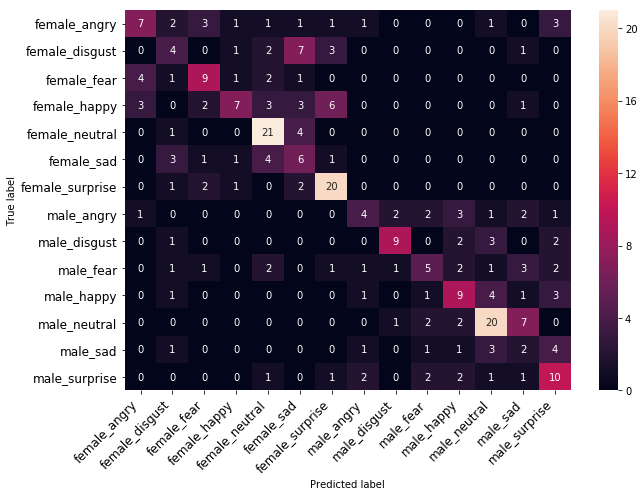

In [250]:
confusion_matrix_result(table_conf, class_names = class_target)

In [232]:
classes = compare_table['actual_values'].unique()
classes.sort()    
print(classification_report(finaldf.actualvalues, finaldf.predictedvalues, target_names=classes))

                 precision    recall  f1-score   support

   female_angry       0.40      0.32      0.35        19
 female_disgust       0.40      0.17      0.24        24
    female_fear       0.42      0.36      0.38        14
   female_happy       0.25      0.17      0.20        18
 female_neutral       0.46      0.73      0.57        26
     female_sad       0.27      0.31      0.29        13
female_surprise       0.38      0.57      0.45        21
     male_angry       0.50      0.50      0.50        18
   male_disgust       0.36      0.45      0.40        20
      male_fear       0.44      0.33      0.38        21
     male_happy       0.12      0.11      0.11        18
   male_neutral       0.56      0.42      0.48        36
       male_sad       0.27      0.36      0.31        22
  male_surprise       0.39      0.39      0.39        18

      micro avg       0.38      0.38      0.38       288
      macro avg       0.37      0.37      0.36       288
   weighted avg       0.39   

## Live Demo

In [102]:
import pyaudio
import wave
 
FORMAT = pyaudio.paInt16
CHANNELS = 1
RATE = 44100
CHUNK = 512
RECORD_SECONDS = 5
WAVE_OUTPUT_FILENAME = "sad_test.wav"
device_index = 2
audio = pyaudio.PyAudio()

print("----------------------record device list---------------------")
info = audio.get_host_api_info_by_index(0)
numdevices = info.get('deviceCount')
for i in range(0, numdevices):
        if (audio.get_device_info_by_host_api_device_index(0, i).get('maxInputChannels')) > 0:
            print("Input Device id ", i, " - ", audio.get_device_info_by_host_api_device_index(0, i).get('name'))

print("-------------------------------------------------------------")

index = int(input())
print("recording via index "+str(index))

stream = audio.open(format=FORMAT, channels=CHANNELS,
                rate=RATE, input=True,input_device_index = index,
                frames_per_buffer=CHUNK)
print ("recording started")
Recordframes = []
 
for i in range(0, int(RATE / CHUNK * RECORD_SECONDS)):
    data = stream.read(CHUNK)
    Recordframes.append(data)
print ("recording stopped")
 
stream.stop_stream()
stream.close()
audio.terminate()
 
waveFile = wave.open(WAVE_OUTPUT_FILENAME, 'wb')
waveFile.setnchannels(CHANNELS)
waveFile.setsampwidth(audio.get_sample_size(FORMAT))
waveFile.setframerate(RATE)
waveFile.writeframes(b''.join(Recordframes))
waveFile.close()

----------------------record device list---------------------
Input Device id  0  -  Microsoft Sound Mapper - Input
Input Device id  1  -  Microphone (SparkoCam Audio)
Input Device id  2  -  Microphone Array (Realtek High 
-------------------------------------------------------------
2
recording via index 2
recording started
recording stopped


In [233]:
data, sampling_rate = librosa.load('sad_test.wav')
ipd.Audio('sad_test.wav')

In [234]:
X, sample_rate = librosa.load('sad_test.wav'
                              ,res_type='kaiser_fast'
                              ,duration=3
                              ,sr=44100
                              ,offset=0.5)

sample_rate = np.array(sample_rate)
mfcc_test = np.mean(librosa.feature.mfcc(y=X, sr=sample_rate, n_mfcc=40),axis=0)
mfcc_test = pd.DataFrame(data=mfcc_test).T
mfcc_test

,0,1,2,3,4,5,6,7,8,9,...,249,250,251,252,253,254,255,256,257,258
0,-12.188271,-12.188271,-12.188271,-12.188271,-12.188271,-8.163282,-5.858769,-6.188755,-8.503152,-8.848659,...,-7.370557,-6.809996,-6.999374,-6.760641,-6.917532,-6.296564,-6.872251,-6.415649,-5.160056,-3.222876


In [235]:
mfcc_test= np.expand_dims(mfcc_test, axis=2)
pred_test = model.predict(mfcc_test, 
                         batch_size=16, 
                         verbose=0)

pred_test

array([[9.1097499e-33, 3.9714523e-29, 4.9144499e-12, 0.0000000e+00,
        7.4309516e-14, 1.0000000e+00, 1.2402209e-31, 0.0000000e+00,
        0.0000000e+00, 0.0000000e+00, 0.0000000e+00, 0.0000000e+00,
        1.4316189e-24, 0.0000000e+00]], dtype=float32)

In [236]:
result = pred_test.argmax(axis=1)
result = result.astype(int).flatten()
result = (lb.inverse_transform((result)))
result

array(['female_sad'], dtype=object)

## Conclusions
Building a machine learning model for sound processing is arguably not easy. The feature extraction process really determines how well the model is created. Choosing the wrong features can cause our model to be less precise in predicting emotional classes. Using the 1D Convolutional model might not be a good approach to this data, we can try to implement Conv2D to get better accuracy. In addition, we also use other feature extractions such as mel spectogram or chroma that might make our models better at predicting emotions.

### Pros
- SER will be very useful if it can be implemented for business areas such as Call Centers where we know that we have limitations to interact directly with them. But with SER we can get their emotions so we know how to respond and interact with them.

### Cons
- Emotions in speech can be interpreted differently by each human being because there is an element of subjectivity there.
- Each utterance contains a composition of words and sentences that are very much, it could be in a single utterance contains several sentences that have different emotions. This then becomes a challenge how much emotion can be detected in it.

## References
- [Practical Cryptoghrapy](http://practicalcryptography.com/miscellaneous/machine-learning/guide-mel-frequency-cepstral-coefficients-mfccs/#eqn1)
- [The Dummy Guide to MFCC](https://medium.com/prathena/the-dummys-guide-to-mfcc-aceab2450fd)
- [Zenodo RAVDESS Dataset](https://zenodo.org/record/1188976)
- [Emotions Classification](https://en.wikipedia.org/wiki/Emotion_classification#Atlas_of_Emotions)
- [Tusar Gupta, Speech Emotions Detection](https://medium.com/@tushar.gupta_47854/speech-emotion-detection-74337966cf2)

# Learn by Buildings
Hello friends, thank you for taking part in the internal training session that I organized. I hope you enjoy it. To hone and deepen your knowledge about the material that I have presented, you can try to do LBB below.There are 2 research datasets commonly used for speech emotion recognition.

1. [Crowd-sourced Emotional Mutimodal Actors Dataset(CREMA-D)](https://github.com/CheyneyComputerScience/CREMA-D)
2. [Toronto Emotional Speech Set Data(TESS)](https://tspace.library.utoronto.ca/handle/1807/24487)
3. If you feel challenged, the CNN model we have created previously has an overfit where this condition is not good enough. Try to improve the model so that it produces good accuracy and does not overfit or underfit.

Based on what we have learned previously (how we read data, extract sound features, create classification models) please choose one of the datasets above and try to do speech emotion recognition by building a machine learning model that is good enough to predict each emotion. You can use whatever machine learning algorithm you know to do this task. Feel free to ask me if you are having a hard time working on it. Thank you and see you at the other internal training which was more exciting than we have done :)